In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import f1_score 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

In [2]:
plate_cascade = cv2.CascadeClassifier('indian_license_plate.xml')

In [ ]:
def detect_plate(img, text=''): 
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7) 
    for (x,y,w,h) in plate_rect:
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2,y), (x+w-3, y+h-5), (51,181,155), 3) 
    if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2), 
                                cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.5, (51,181,155), 1, cv2.LINE_AA)
        
    return plate_img, plate 

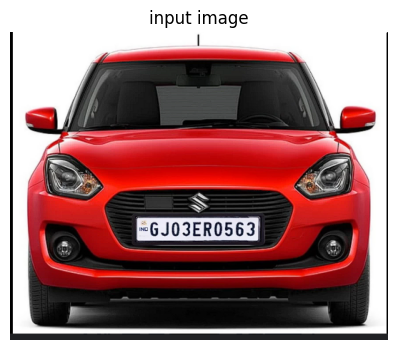

In [17]:
def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(7,4))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

img = cv2.imread('car2.png')
display(img, 'input image')

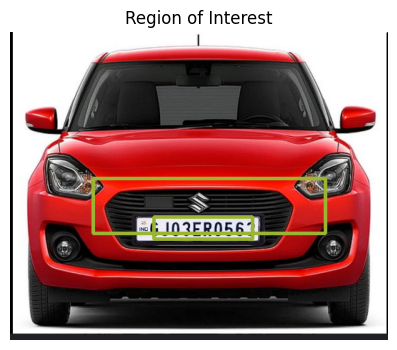

In [18]:
output_img, plate = detect_plate(img)
display(output_img, 'Region of Interest')

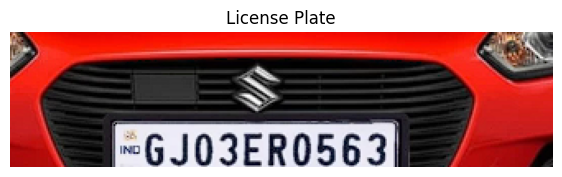

In [19]:
display(plate, 'License Plate')

In [9]:
import tensorflow.keras as tf
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = 'data\data'
train_generator = train_datagen.flow_from_directory(
        path+'/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [10]:
model = Sequential()
model.add(Conv2D(16, (32,32), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
batch_size = 1
# callbacks = [tf.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')]
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      epochs = 50, verbose=1)

Epoch 1/50
  1/864 [..............................] - ETA: 1:10 - loss: 3.5237 - accuracy: 0.0000e+00

C:\Users\akshi\AppData\Local\Temp\ipykernel_17416\3282206464.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


864/864 [==============================] - 31s 36ms/step - loss: 3.4252 - accuracy: 0.1169 - val_loss: 3.2270 - val_accuracy: 0.1296
Epoch 2/50
864/864 [==============================] - 30s 35ms/step - loss: 3.1590 - accuracy: 0.1331 - val_loss: 3.1957 - val_accuracy: 0.1435
Epoch 3/50
864/864 [==============================] - 31s 36ms/step - loss: 3.1744 - accuracy: 0.1262 - val_loss: 3.2399 - val_accuracy: 0.1481
Epoch 4/50
864/864 [==============================] - 32s 37ms/step - loss: 3.1823 - accuracy: 0.1157 - val_loss: 3.1504 - val_accuracy: 0.1389
Epoch 5/50
864/864 [==============================] - 34s 39ms/step - loss: 2.9825 - accuracy: 0.1424 - val_loss: 2.7917 - val_accuracy: 0.1574
Epoch 6/50
864/864 [==============================] - 33s 38ms/step - loss: 3.0524 - accuracy: 0.1343 - val_loss: 2.8679 - val_accuracy: 0.1667
Epoch 7/50
864/864 [==============================] - 35s 40ms/step - loss: 3.1604 - accuracy: 0.1389 - val_loss: 2.7819 - val_accuracy: 0.1713
Epo